### Import Modules

In [9]:
import glob 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys, os, nilearn
import numpy as np
from nilearn import plotting, input_data
import nilearn

#### Preparing and saving a Masker for the Shen-Parcellation
This is so that we later can inverse-transform and plot the ISC results

In [10]:
from nilearn import input_data, datasets

all293_rois_file       = '../../data_lpp/fmri_data/other/allcombined.nii'

all293_masker = input_data.NiftiLabelsMasker(all293_rois_file, 
                                             detrend     = True, 
                                             standardize = True,
                                             high_pass   = 0.01, 
                                             t_r         = 2.0, 
                                             low_pass    = 0.12 );

all293_masker.fit('/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/LPP/data/bids/sub-EN107/func/sub-EN107_task-lppEN_run-08_space-MNIColin27_desc-preproc_bold.nii.gz')

NiftiLabelsMasker(detrend=True, high_pass=0.01,
                  labels_img='../../data_lpp/fmri_data/other/allcombined.nii',
                  low_pass=0.12, standardize=True, t_r=2.0)

In [12]:
d = np.load('/Users/ralfschmaelzle/Documents/GITHUB/nomcomm/PAPERS_WORKING/littleprince_multilingual/data_lpp/fmri_data/other/shen_pauli_aan_dict.npy', allow_pickle=True).item()
d[90]

{'coords': [6.3299270072992755, -57.185401459854006, 38.08759124087591],
 'name': '83.65% Precuneous_Cortex; 16.35% Cingulate_Gyrus_posterior_division',
 'index_label': 90,
 'data_array_index': 89}

{'coords': [6.3299270072992755, -57.185401459854006, 38.08759124087591], 'name': '83.65% Precuneous_Cortex; 16.35% Cingulate_Gyrus_posterior_division', 'index_label': 90, 'data_array_index': 89}
(1, 268)


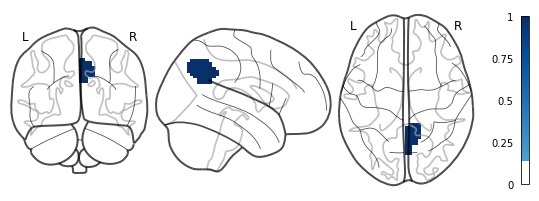

In [15]:
shen_file       = '../../data_lpp/fmri_data/other/shen_2mm_268_parcellation.nii'
shen_masker = nilearn.input_data.NiftiLabelsMasker(labels_img=shen_file);
sample_file = '../../data_lpp/fmri_data/other/func.nii'
shen_masker.fit_transform(sample_file);

#load shendict
shen_pauli_aan_dict = np.load('../../data_lpp/fmri_data/other/shen_pauli_aan_dict.npy', allow_pickle=True).item()
print(shen_pauli_aan_dict[90])


r2       = np.zeros((1,268))
r2[0,shen_pauli_aan_dict[90]['data_array_index']] = 1
print(r2.shape)

res_img  = shen_masker.inverse_transform(r2);
plotting.plot_glass_brain(nilearn.image.index_img(res_img,0), 
                          colorbar=True, 
                          annotate = True,
                          cmap="Blues", 
                          threshold=0.15,
                          plot_abs=False, 
                         );

In [20]:
res_img.to_filename('precu.nii.gz')

In [ ]:
regions_to_extract = ['../data/maps/mentalizing_fine.nii',
                      #'../data/maps/mentalizing_resampled.nii'
                     ]

target_dirs = ['../data/timeseries/mentalizing/fine/',
               #'../data/timeseries/mentalizing/resampled/',
              ]

file_appendix = ['_LTR_Z_THP001_mentalizingfine_regional_average.npy',
                #'_partly_LTR_Z_THP001_mentalizingresampled_regional_average.npy'
                ]

for curr_region, curr_targetdir, curr_appendix in zip(regions_to_extract, target_dirs, file_appendix):

    labels_masker = input_data.NiftiLabelsMasker(curr_region, detrend = True, standardize = True,
                                                high_pass  = 0.01, t_r = 2.0, #low_pass   = 0.12,
                                                );

    for curr_subj in range(n_subjs):
        sys.stdout.write(str(curr_subj) + ',')

        func_filename      = dataset.func[curr_subj]
        confounds_filename = dataset.confounds[curr_subj]
        curr_sub_name      = dataset['phenotypic'][curr_subj][0] 
        outname            = curr_targetdir + curr_sub_name + curr_appendix

        if not os.path.exists(outname):
            time_series = labels_masker.fit_transform(func_filename, confounds=[confounds_filename])
            np.save(outname, time_series) 